<a href="https://colab.research.google.com/github/abhee235/ML/blob/master/first_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import print_function
import math
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from tensorflow.python.data import Dataset
from sklearn import metrics

tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}' .format

In [0]:
chdf = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")

chdf = chdf.reindex(np.random.permutation(chdf.index))
chdf['median_house_value'] /= 1000.0
chdf

In [0]:
my_feature = chdf[["total_rooms"]]
feature_columns = [tf.feature_column.numeric_column('total_rooms')]
feature_columns

#tfeatures = {key: np.array(value) for key,value in dict(my_feature).items()}
#tfeatures

In [0]:
target = chdf["median_house_value"]

In [0]:
#configure optimizer
my_optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.00001)
my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)

#regressor
linear_regressor = tf.estimator.LinearRegressor(
    feature_columns = feature_columns,
    optimizer = my_optimizer
)

In [0]:
def my_input_fn(features, targets, batch_size = 1, shuffle = True, num_epochs = None):
  
  """Train linear Regression model for one feature"""
  
  #convert panda dataframe to dict of np arrays
  features = {key: np.array(value) for key,value in dict(features).items()}
  
  ds = Dataset.from_tensor_slices((features, targets))
  ds = ds.batch(batch_size).repeat(num_epochs)
  
  if shuffle == True:
    ds.shuffle(buffer_size = 10000)
    
  #Return the data
  features, labels = ds.make_one_shot_iterator().get_next()
  return features, labels

In [104]:

_ = linear_regressor.train(
    input_fn = lambda : my_input_fn(my_feature, target),
    steps=30
)

prediction_input_fn = lambda : my_input_fn(my_feature, target, shuffle= False, num_epochs =1)
predictions = linear_regressor.predict(input_fn = prediction_input_fn)
predictions = np.array([item['predictions'][0] for item in predictions])


#Calculate RMS of this model
MS_error = metrics.mean_squared_error(predictions, target)
RMS_error = math.sqrt(MS_error)

#print("Mean Squared Error (on training data): %0.3f" %MS_error)
print("Root Mean Squared Error (on training data): %0.3f" %RMS_error)

Root Mean Squared Error (on training data): 186.301


In [0]:
#visualise RMS
#chdf.describe
house_Min_Value = chdf["median_house_value"].min()
house_max_value = chdf["median_house_value"].max()

diff = house_max_value - house_Min_Value
print(diff)
print("Mean Squared Error (on training data): %0.3f" %MS_error)
print("Root Mean Squared Error (on training data): %0.3f" %RMS_error)

In [0]:
caliberation_data = pd.DataFrame()
caliberation_data["Prediction"] = pd.Series(predictions)
caliberation_data["target"] = pd.Series(target)

caliberation_data.describe()

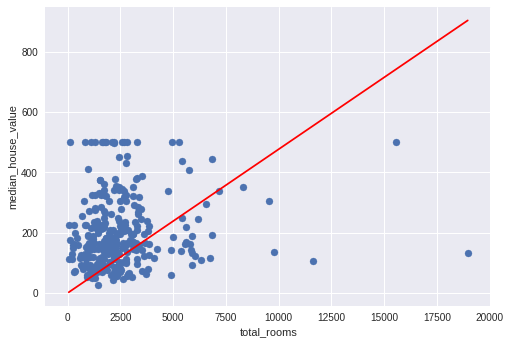

In [95]:
sample = chdf.sample(n=300)
x_0 = sample["total_rooms"].min()
x_1 = sample["total_rooms"].max()

weight = linear_regressor.get_variable_value('linear/linear_model/total_rooms/weights')[0]
bias = linear_regressor.get_variable_value('linear/linear_model/bias_weights')
bias

#predicted median house value
y_0 = weight * x_0 + bias
y_1 = weight * x_1 + bias

#plot the graph to analysise the regression output 
plt.plot([x_0,x_1], [y_0, y_1], c='r')

plt.xlabel("total_rooms")
plt.ylabel("median_house_value")

plt.scatter(sample["total_rooms"],sample["median_house_value"])
plt.show()

